<a href="https://colab.research.google.com/github/jiin124/Introduction-to-NLP-using-deep-learning/blob/main/%EC%9B%8C%EB%93%9C%EC%9E%84%EB%B2%A0%EB%94%A9/3_%EC%98%81%EC%96%B4_%ED%95%9C%EA%B5%AD%EC%96%B4_Word2Vec_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gensim 패키지에서 제공하는 이미 구현된 Word2Vec을 사용하여 영어와 한국어 데이터를 학습합니다.

# 1. 영어 Word2Vec 만들기

파이썬의 gensim 패키지에는 Word2Vec을 지원하고 있어, gensim 패키지를 이용하면 손쉽게 단어를 임베딩 벡터로 변환시킬 수 있습니다. 

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize,sent_tokenize

python에도 lxml을 설치하면 css 문법으로 특정 요소를 쉽게 가져올 수 있다.

In [2]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f0158c35910>)



```
<file id="1">
  <head>
<url>http://www.ted.com/talks/knut_haanaes_two_reasons_companies_fail_and_how_to_avoid_them</url>
       <pagesize>72832</pagesize>
... xml 문법 중략 ...
<content>
Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities:
... content 내용 중략 ...
To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.
(Laughter)
... content 내용 중략 ...
(Applause)
</content>
</file>
<file id="2">
    <head>
<url>http://www.ted.com/talks/lisa_nip_how_humans_could_evolve_to_survive_in_space<url>
... 이하 중략 ...
```




## 훈련데이터 전처리하기

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
targetXML=open('ted_en-20160408.xml','r',encoding='UTF8')
target_text=etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

#입력 코퍼스에 대해서 NLTK를 이용해 문장 토큰화 수행
sent_text=sent_tokenize(content_text)



In [9]:
sent_text[:5]

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.',
 'Both are necessary, but it can be too much of a good thing.',
 'Consider Facit.',
 "I'm actually old enough to remember them."]

In [11]:
#각 문장에 대해서 구두점을 제거하고 대문자를 소문자로 변환
normalized_text=[]
for string in sent_text:
  tokens=re.sub(r"[^a-z0-9]+"," ",string.lower())
  normalized_text.append(tokens)

normalized_text[:5]


['here are two reasons companies fail they only do more of the same or they only do what s new ',
 'to me the real real solution to quality growth is figuring out the balance between two activities exploration and exploitation ',
 'both are necessary but it can be too much of a good thing ',
 'consider facit ',
 'i m actually old enough to remember them ']

In [12]:
#각문장에 대해서 NLTK를 이용해 단어 토큰화를 수행.
result=[word_tokenize(sentence) for sentence in normalized_text]


In [14]:
result[:2]

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation']]

In [15]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [16]:
#샘플 3개만 출력, 상위 3개 문장만 출력해보았다.
for line in result[:3]:
  print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


## Word2Vec 훈련시키기

In [17]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model=Word2Vec(sentences=result,size=100,window=5,min_count=5,workers=4,sg=0)

Word2Vec 의 하이퍼파라미터 값은 다음과 같다.
- `size`=워드 벡터의 특징 값, 즉 임베딩 된 벡터의 차원
- `window`= 컨덱스트 윈도우 크기
- `min_count`=단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.
-`workers`= 학습을 위한 프로세스 수
- sg=0은 CBOW, 1은 Skip-gram

Word2Vec는 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 ** model.wv.most_similar** 을 지원합니다. man과 가장 유사한 단어들은 어떤 단어들일까요?

In [18]:
model_result=model.wv.most_similar("man")
print(model_result)

[('woman', 0.8561145663261414), ('lady', 0.805709958076477), ('guy', 0.7982200980186462), ('girl', 0.7741529941558838), ('gentleman', 0.7597988843917847), ('boy', 0.7584332227706909), ('soldier', 0.7292793393135071), ('kid', 0.7124245166778564), ('poet', 0.7008294463157654), ('writer', 0.6607033014297485)]


## Word2Vec 모델 저장하고 로드하기


In [20]:
model.wv.save_word2vec_format('eng_w2v')#모델 저장
loaded_model=KeyedVectors.load_word2vec_format("eng_w2v")#모델 로드

In [21]:
#로드한 모델에 대해서 다시 man과 유사한 단어 출력
model_result=loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8561145663261414), ('lady', 0.805709958076477), ('guy', 0.7982200980186462), ('girl', 0.7741529941558838), ('gentleman', 0.7597988843917847), ('boy', 0.7584332227706909), ('soldier', 0.7292793393135071), ('kid', 0.7124245166778564), ('poet', 0.7008294463157654), ('writer', 0.6607033014297485)]


# 한국어 Word2Vec 만들기(네이버 영화 리뷰)

네이버 영화 리뷰 데이터로 한국어 Word2Vec을 만들어보자.

In [23]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 60.4 MB/s 


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [25]:
#네이버 영화 리뷰 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f01428ee850>)

In [26]:
train_data=pd.read_table('ratings.txt')

In [27]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [28]:
print(len(train_data))

200000


In [29]:
#NULL값 확인
print(train_data.isnull().values.any())

True


In [30]:
#결측값이 존재하므로 결측값이 존재하는 행을 제거
train_data=train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [31]:
print(len(train_data))

199992


In [32]:
#정규표현식을 통해 한글이 아닌 경우를 제거하는 전처리
train_data['document']=train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [33]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


학습시에 사용하고 싶지 않은 단어들인 불용어 제거. 형태소 분석기 Okt를 사용하여 각 문장에 대해서 일종의 단어 내지는 형태소 단위로 나누는 토큰화를 수행한다. 다소 시간이 소요될 수 있다. 

In [35]:
from tqdm import tqdm#진행정도를 보여주는 모듈
#불용어 정의
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를',
           '으로','자','에','와','한','하다']

okt=Okt()

tokenized_data=[]
for sentence in tqdm(train_data['document']):
  tokenized_sentence=okt.morphs(sentence,stem=True)#토큰화
  stopwords_removed_sentence=[word for word in tokenized_sentence if not word in stopwords]#토큰화
  tokenized_data.append(stopwords_removed_sentence)


100%|██████████| 199992/199992 [10:17<00:00, 323.75it/s]


리뷰 최대 길이 : 72
리뷰 평균 길이: 10.716703668146726


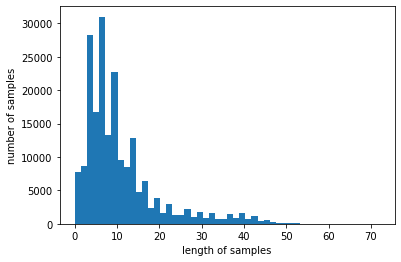

In [36]:
#리뷰 길이 분포 확인
print('리뷰 최대 길이 :' ,max(len(review) for review in tokenized_data))
print('리뷰 평균 길이:',sum(map(len,tokenized_data))/len(tokenized_data))

plt.hist([len(review) for review in tokenized_data],bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
from gensim.models import Word2Vec

model=Word2Vec(sentences=tokenized_data,size=100,window=5,min_count=5,workers=4,sg=0)
#size(워드 벡터의 특징 값)는 100,윈도우 크기=5, 단어최소빈도수제한 5,
# workers 학습을 위한 프로세스 수 4개 ,sg=CBOW


size=워드 벡터의 특징 값, 즉 임베딩 된 벡터의 차원
window= 컨덱스트 윈도우 크기
min_count=단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.
workers= 학습을 위한 프로세스 수
sg=0은 CBOW, 1은 Skip-gram

In [39]:
#완성된 임베딩 매트릭스 크기 확인
model.wv.vectors.shape

(16477, 100)

총 16,477개의 단어가 존재하며 각 단어는 100차원으로 구성되어져 있습니다. '최민식'과 유사한 단어들을 뽑아봅시다.

In [40]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8970428705215454), ('송강호', 0.8579207062721252), ('채민서', 0.8559132218360901), ('김명민', 0.8523083329200745), ('이정재', 0.8409397602081299), ('안성기', 0.8378635048866272), ('엄태웅', 0.8304440975189209), ('오광록', 0.8263113498687744), ('박중훈', 0.8257790803909302), ('크리스찬', 0.8205402493476868)]


In [49]:
print(model.wv.most_similar("마블"))

[('마스터피스', 0.8447866439819336), ('스타워즈', 0.842664897441864), ('단언컨대', 0.8336366415023804), ('알포인트', 0.8319262862205505), ('반지', 0.8262678384780884), ('어드벤쳐', 0.8218613862991333), ('황비홍', 0.8187637329101562), ('여고괴담', 0.8107162714004517), ('역사드라마', 0.8105252981185913), ('슈렉', 0.8071367740631104)]


# 사전훈련된 Word2Vec 임베딩 소개

자연어 처리 작업을 할때, 케라스의 Embedding()를 사용하여 갖고 있는 훈련 데이터로부터 처음부터 임베딩 벡터를 훈련시키기도 하지만, 위키피디아 등의 방대한 데이터로 사전에 훈련된 워드 임베딩(pre-trained word embedding vector)를 가지고 와서 해당 벡터들의 값을 원하는 작업에 사용 할 수도 있습니다.

예를 들어서 감성 분류 작업을 하는데 훈련 데이터의 양이 부족한 상황이라면, 다른 방대한 데이터를 Word2Vec이나 GloVe 등으로 사전에 학습시켜놓은 임베딩 벡터들을 가지고 와서 모델의 입력으로 사용하는 것이 때로는 더 좋은 성능을 얻을 수 있습니다. 사전 훈련된 워드 임베딩을 가져와서 간단히 단어들의 유사도를 구해보는 실습을 해보겠습니다. 실제로 모델에 적용해보는 실습은 향후에 진행합니다.

구글이 제공하는 사전 훈련된(미리 학습되어져 있는) Word2Vec 모델을 사용하는 방법에 대해서 알아보겠습니다. 구글은 사전 훈련된 3백만 개의 Word2Vec 단어 벡터들을 제공합니다. 각 임베딩 벡터의 차원은 300입니다. gensim을 통해서 이 모델을 불러오는 건 매우 간단합니다. 이 모델을 다운로드하고 파일 경로를 기재하면 됩니다.

모델 다운로드 경로 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [50]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [51]:
print(word2vec_model.vectors.shape)

(3000000, 300)


모델의 크기는 3,000,000 x 300입니다. 즉, 3백만 개의 단어와 각 단어의 차원은 300입니다. 파일의 크기가 3기가가 넘는 이유를 계산해보면 아래와 같습니다.

사전 훈련된 임베딩을 사용하여 두 단어의 유사도를 계산해봅시다.

In [52]:
print(word2vec_model.similarity('this','is'))
print(word2vec_model.similarity('post','book'))

0.40797037
0.057204384


In [53]:
print(word2vec_model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04